In [18]:
using Pkg
Pkg.activate("/Users/jiyong/development/Projects/nImageData.jl")
using OpenCV
using CairoMakie, Images, FileIO


  Activating project at `~/development/Projects/nImageData.jl`


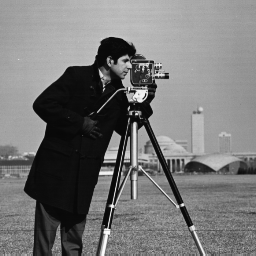

In [2]:
img = OpenCV.imread("cameraman.png", OpenCV.IMREAD_GRAYSCALE)

In [120]:
function Mat2Array(img::OpenCV.Mat{T}) where T<:Integer
    return permutedims(img.data, [3,2,1])
end


function Array2Mat(img::Array{T}) where {T<:Real}
    ll = length(size(img))
    @assert ll ∈ (2, 3)
    if ll == 3 
        return OpenCV.Mat(permutedims(img, [3,1,2]))
    else 
        return OpenCV.Mat(permutedims(stack([img, ]), [3,1,2]))
    end
end



"""
    mat2gray(mat::Matrix{<:Real}, range::Union{Nothing, Tuple{Real, Real}} )

Convert matrix to gray Image of Images.jl. 
"""
function mat2gray(mat::Matrix{T}, range::Union{Nothing, Tuple{Real, Real}} = nothing ) where T<: Real
    if range === nothing
        mv, Mv = extrema(mat)
        return  Gray.((mat .- mv)./(Mv-mv))
    else 
        mv, Mv = minmax(range...)
        return Gray.(clamp.((mat .-mv)/(Mv-mv), zero(T), one(T)))

    end
end

function mat2gray(mat::Matrix{T}, range::Union{Nothing, Tuple{Real, Real}} = nothing ) where T<: Integer
    return mat2gray(Float32.(mat), range)
end

function sand_pepper_noise(img::Matrix{T}, ratio::Real) where {T<:Integer}
    @assert 0<ratio<1
    tm, tM = typemin(T), typemax(T)
    w, h = size(img)
    Nnoise = round(Int, w*h*ratio)
    _x, _y = rand(1:w, Nnoise), rand(1:h, Nnoise)
    for i in 1:Nnoise 
        if iseven(i)
            img[_y[i], _x[i]] = tm
        else 
            img[_y[i], _x[i]] = tM
        end
    end
    return img
end 

sand_pepper_noise (generic function with 1 method)

In [138]:
arr1=Mat2Array(img)
arr2 = sand_pepper_noise(arr1[:,:,1], 0.03)

256×256 Matrix{UInt8}:
 0x9c  0x9f  0x9e  0x9b  0x9e  0x9c  …  0x9c  0x9a  0x99  0x97  0x98  0x98
 0xa0  0x9a  0x9d  0x9e  0x9d  0x9f     0x9d  0x9b  0x9b  0x9a  0x9b  0x99
 0x9c  0x9f  0x9e  0x9b  0x9e  0x9c     0x9c  0x9a  0x99  0x97  0x98  0x98
 0xa0  0x9a  0x9d  0x9e  0x9d  0x9f     0x9d  0x9b  0x9b  0x9a  0x9b  0x99
 0x9c  0x99  0x9b  0x9f  0x9f  0x9b     0x97  0x96  0x98  0x99  0x97  0x97
 0x9b  0x9b  0x9b  0x9d  0x9c  0x9f  …  0x9a  0x8e  0x8d  0x95  0x96  0x99
 0x9c  0x99  0x9d  0x9c  0x99  0x9b     0x97  0x94  0x98  0x96  0x98  0x95
 0x9f  0x9f  0x9c  0x9e  0x9c  0x9f     0x99  0x93  0x96  0x93  0x93  0x93
 0x9e  0x9b  0x9e  0x9a  0x9c  0xa0     0x98  0x93  0x9a  0x95  0x96  0x93
 0x00  0x9a  0x9d  0x9e  0xa0  0xa0     0x95  0x98  0x96  0x94  0x97  0x99
    ⋮                             ⋮  ⋱     ⋮                             ⋮
 0x6a  0x8c  0x92  0x79  0x7e  0x6f     0x78  0x88  0x92  0x80  0x70  0x88
 0x89  0x7a  0x66  0x6c  0x72  0x6c     0x7c  0x92  0x7e  0x80  0x8b  0x60
 0

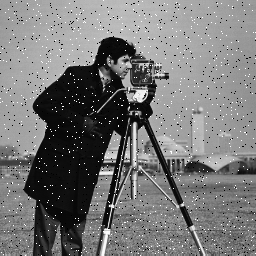

In [139]:
#save("noisy_cameraman.png", mat2gray(arr2[:,:,1]), )
mat2gray(arr2[:,:,1])

In [149]:
size(Array2Mat(arr2))

(1, 256, 256)

In [150]:
img3 = OpenCV.medianBlur(Array2Mat(arr2), 3)[1,:,:]

256×256 Matrix{UInt8}:
 0x9c  0x9e  0x9e  0x9e  0x9d  0x9e  …  0x9b  0x9b  0x9a  0x99  0x98  0x98
 0x9c  0x9e  0x9e  0x9e  0x9d  0x9e     0x9b  0x9b  0x9a  0x99  0x98  0x98
 0x9f  0x9d  0x9d  0x9d  0x9e  0x9e     0x9c  0x9b  0x9a  0x9a  0x99  0x99
 0x9c  0x9c  0x9d  0x9e  0x9e  0x9e     0x9b  0x9a  0x99  0x99  0x98  0x98
 0x9b  0x9b  0x9b  0x9d  0x9e  0x9d     0x9a  0x98  0x98  0x98  0x99  0x99
 0x9b  0x9b  0x9b  0x9c  0x9c  0x9b  …  0x97  0x97  0x96  0x97  0x97  0x97
 0x9c  0x9c  0x9c  0x9c  0x9c  0x9c     0x97  0x96  0x94  0x96  0x95  0x95
 0x9e  0x9d  0x9c  0x9c  0x9c  0x9c     0x97  0x97  0x95  0x96  0x95  0x93
 0x9e  0x9d  0x9d  0x9d  0x9e  0x9f     0x96  0x96  0x95  0x96  0x94  0x93
 0x9a  0x9d  0x9d  0x9d  0x9d  0x9f     0x97  0x98  0x96  0x96  0x96  0x99
    ⋮                             ⋮  ⋱     ⋮                             ⋮
 0x6a  0x77  0x77  0x72  0x6c  0x72     0x78  0x7e  0x81  0x81  0x80  0x70
 0x89  0x7a  0x79  0x79  0x72  0x72     0x7c  0x7e  0x80  0x7e  0x78  0x6a
 0

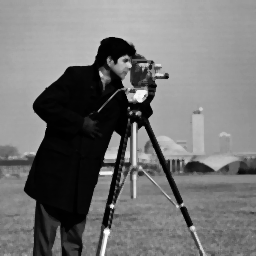

In [151]:
#save("denoised_cameramen_1.png", mat2gray(img3))
mat2gray(img3)

In [162]:
size(Array2Mat(stack([arr2,])))

(1, 256, 256)

In [164]:
x4=OpenCV.medianBlur(Array2Mat(stack([arr2,])),3)[1,:,:]

256×256 Matrix{UInt8}:
 0x9c  0x9e  0x9e  0x9e  0x9d  0x9e  …  0x9b  0x9b  0x9a  0x99  0x98  0x98
 0x9c  0x9e  0x9e  0x9e  0x9d  0x9e     0x9b  0x9b  0x9a  0x99  0x98  0x98
 0x9f  0x9d  0x9d  0x9d  0x9e  0x9e     0x9c  0x9b  0x9a  0x9a  0x99  0x99
 0x9c  0x9c  0x9d  0x9e  0x9e  0x9e     0x9b  0x9a  0x99  0x99  0x98  0x98
 0x9b  0x9b  0x9b  0x9d  0x9e  0x9d     0x9a  0x98  0x98  0x98  0x99  0x99
 0x9b  0x9b  0x9b  0x9c  0x9c  0x9b  …  0x97  0x97  0x96  0x97  0x97  0x97
 0x9c  0x9c  0x9c  0x9c  0x9c  0x9c     0x97  0x96  0x94  0x96  0x95  0x95
 0x9e  0x9d  0x9c  0x9c  0x9c  0x9c     0x97  0x97  0x95  0x96  0x95  0x93
 0x9e  0x9d  0x9d  0x9d  0x9e  0x9f     0x96  0x96  0x95  0x96  0x94  0x93
 0x9a  0x9d  0x9d  0x9d  0x9d  0x9f     0x97  0x98  0x96  0x96  0x96  0x99
    ⋮                             ⋮  ⋱     ⋮                             ⋮
 0x6a  0x77  0x77  0x72  0x6c  0x72     0x78  0x7e  0x81  0x81  0x80  0x70
 0x89  0x7a  0x79  0x79  0x72  0x72     0x7c  0x7e  0x80  0x7e  0x78  0x6a
 0

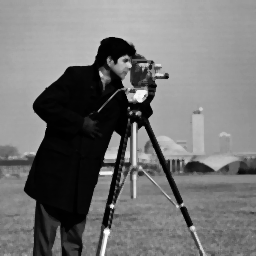

In [165]:
mat2gray(x4)

In [ ]:
x4 = OpenCV.medianBlur(Array2Mat())

4×5×2 Array{Int64, 3}:
[:, :, 1] =
 1  5   9  13  17
 2  6  10  14  18
 3  7  11  15  19
 4  8  12  16  20

[:, :, 2] =
 21  25  29  33  37
 22  26  30  34  38
 23  27  31  35  39
 24  28  32  36  40

In [43]:
b=permutedims(a, [3,2,1])

2×5×4 Array{Int64, 3}:
[:, :, 1] =
  1   5   9  13  17
 21  25  29  33  37

[:, :, 2] =
  2   6  10  14  18
 22  26  30  34  38

[:, :, 3] =
  3   7  11  15  19
 23  27  31  35  39

[:, :, 4] =
  4   8  12  16  20
 24  28  32  36  40

In [44]:
permutedims(b, [3,2,1])

4×5×2 Array{Int64, 3}:
[:, :, 1] =
 1  5   9  13  17
 2  6  10  14  18
 3  7  11  15  19
 4  8  12  16  20

[:, :, 2] =
 21  25  29  33  37
 22  26  30  34  38
 23  27  31  35  39
 24  28  32  36  40

In [47]:
rand(1:100, (3, 4))

3×4 Matrix{Int64}:
 75  75  70  99
 54  35  13  40
 21  76   4  71